In [8]:
import os
import numpy as np
import pickle
import cv2
import matplotlib.pyplot as plt
import SimpleITK as st
%matplotlib inline

In [5]:
path = 'mha_files'

count = 0
features = []
labels = []
list_dir = os.listdir(path)
len_list_dir = len(list_dir)

In [6]:
print('STARTED', end ='')
for filename in list_dir:
    #print('Iteration #'+str(count)+'/#'+str(len_list_dir))
    if(count % 10 == 0):
        print('.',end='')
    path_1 = os.path.join(path, filename)
    l1 = os.listdir(path_1)
    img_feature_path, img_label_path = os.path.join(path_1, l1[0]), os.path.join(path_1, l1[1])
    #print(img_feature_path,' ', img_label_path)
    
    imgT1cOriginal = st.ReadImage(img_feature_path)
    imgOT = st.ReadImage(img_label_path)
    #nda = st.GetArrayFromImage(imgT1cOriginal[:, :, 50:100])
    #print(nda.shape)
    nda1 = st.GetArrayFromImage(imgOT[:, :, 50:100])
    imgT1cSmooth = st.CurvatureFlow(image1=imgT1cOriginal,
                                          timeStep=0.125,                                       
                                          numberOfIterations=5)
    
    pew = st.GetArrayFromImage(imgT1cSmooth[:,:,50:100])
    features.append(pew)
    #print(features)
    labels.append(nda1)
    count = count + 1
print('\n done ;)')

STARTED......................
 done ;)


In [24]:
np.shape(features)

(220, 50, 240, 240)

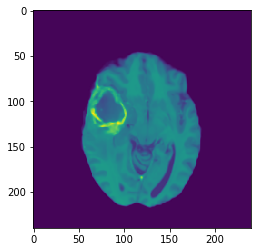

In [14]:
plt.imshow(features[0][15])

In [56]:
features[0][0][50][50]

0.0

In [95]:
def get_list(arr_sent):
    l = []
    l1 = []
    l2 = []
    c1 = 0;c2 = 0
    for i in range(0,240):
        #print(np.shape(i),end='\t')
        for j in range(0,240):
            for k in arr_sent:
                l.append(k[c1][c2])
            l1.append(l)
            c2 += 1
            l =[]
        c1 += 1
        c2 = 0
        l2.append(l1)
        l1 = []   
        #l.append(i[10][10])
    #print(l)
    return l2

In [98]:
final_l = []
count = 0
print('Started',end='')
for i in features:
    if(count % 10 == 0):
        print('.',end='')
    l1 = get_list(i)
    final_l.append(l1)
    count +=1
print('\ndone')

Started......................
done


In [90]:
l3 = np.array(l2)

In [91]:
np.shape(l3)

(240, 240, 50)

In [ ]:
l3[100]

for i in range(220):
    for j in range(50):
        for k in range(240):
            for l in range(240):
                print(features[i][j][k][l])

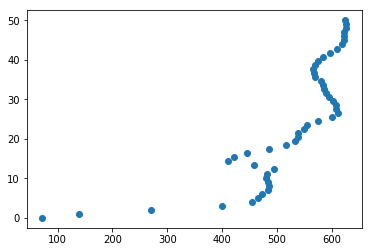

In [92]:
plt.scatter(l3[100][100],np.linspace(0,50,50))
#np.shape()

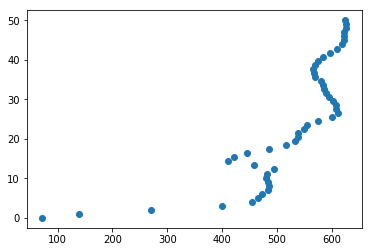

In [93]:
l = []

for i in features[0]:
    #print(np.shape(i),end='\t')
    l.append(i[100][100])
#print(l)
plt.scatter(l,np.linspace(0,50,50))